In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
from numpy import argmax
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder, StandardScaler
import glob
import os
import warnings
warnings.filterwarnings('ignore')
#from PIL import Image
#import csv
#import pathlib
#from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.client import device_lib
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Activation, BatchNormalization, ZeroPadding2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Dense, Dropout, Conv1D, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
import keras
import soundfile
import librosa
import librosa.display
import IPython.display


In [2]:

path = "./music_files"
files=glob.glob(path + "/**/*.wav", recursive = True)
names = [os.path.basename(x) for x in glob.glob(path + "/**/*.wav", recursive = True)]
print(names)

['000002.wav', '000005.wav', '000010.wav', '000140.wav', '000141.wav', '000148.wav', '000182.wav', '000190.wav', '000193.wav', '000194.wav', '000197.wav', '000200.wav', '000203.wav', '000204.wav', '000207.wav', '000210.wav', '000211.wav', '000212.wav', '000213.wav', '000255.wav', '000256.wav', '000368.wav', '000424.wav', '000459.wav', '000534.wav', '000540.wav', '000546.wav', '000574.wav', '000602.wav', '000615.wav', '000620.wav', '000621.wav', '000625.wav', '000666.wav', '000667.wav', '000676.wav', '000690.wav', '000694.wav', '000695.wav', '000704.wav', '000705.wav', '000706.wav', '000707.wav', '000708.wav', '000709.wav', '000714.wav', '000715.wav', '000716.wav', '000718.wav', '000777.wav', '000814.wav', '000821.wav', '000822.wav', '000825.wav', '000853.wav', '000890.wav', '000892.wav', '000897.wav', '000993.wav', '000995.wav', '000997.wav', '000998.wav', '001039.wav', '001040.wav', '001066.wav', '001069.wav', '001073.wav', '001075.wav', '001082.wav', '001083.wav', '001087.wav', '0011

In [3]:
namesst=[]
namesst = {x.replace('.wav', '')for x in names}
namesst={int(x) for x in namesst}
namesst

{2,
 5,
 10,
 140,
 141,
 148,
 182,
 190,
 193,
 194,
 197,
 200,
 203,
 204,
 207,
 210,
 211,
 212,
 213,
 255,
 256,
 368,
 424,
 459,
 534,
 540,
 546,
 574,
 602,
 615,
 620,
 621,
 625,
 666,
 667,
 676,
 690,
 694,
 695,
 704,
 705,
 706,
 707,
 708,
 709,
 714,
 715,
 716,
 718,
 777,
 814,
 821,
 822,
 825,
 853,
 890,
 892,
 897,
 993,
 995,
 997,
 998,
 1039,
 1040,
 1066,
 1069,
 1073,
 1075,
 1082,
 1083,
 1087,
 1102,
 1193,
 1195,
 1196,
 1197,
 1249,
 1259,
 1270,
 1276,
 1277,
 1278,
 1417,
 1427,
 1443,
 1482,
 1510,
 1544,
 1642,
 1644,
 1649,
 1661,
 1663,
 1666,
 1673,
 1680,
 1681,
 1682,
 1683,
 1684,
 1685,
 1686,
 1687,
 1688,
 1689,
 1701,
 1702,
 1703,
 1704,
 1706,
 1720,
 1732,
 1733,
 1735,
 1736,
 1883,
 1891,
 1893,
 1924,
 1925,
 1929,
 1930}

In [4]:
dt=pd.read_csv('./fma_metadata/tracks.csv')
dt

Unnamed: 0     album              album.1              album.2  \
0             NaN  comments         date_created        date_released   
1        track_id       NaN                  NaN                  NaN   
2               2         0  2008-11-26 01:44:45  2009-01-05 00:00:00   
3               3         0  2008-11-26 01:44:45  2009-01-05 00:00:00   
4               5         0  2008-11-26 01:44:45  2009-01-05 00:00:00   
...           ...       ...                  ...                  ...   
106571     155316         0  2017-03-30 15:20:35  2017-02-17 00:00:00   
106572     155317         0  2017-03-30 15:20:35  2017-02-17 00:00:00   
106573     155318         0  2017-03-30 15:20:35  2017-02-17 00:00:00   
106574     155319         0  2017-03-30 15:20:35  2017-02-17 00:00:00   
106575     155320         0  2017-03-26 16:22:18  2017-03-26 00:00:00   

         album.3    album.4 album.5  \
0       engineer  favorites      id   
1            NaN        NaN     NaN   
2            NaN          4       1   
3            NaN          4       1   
4            NaN          4       1   
...          ...        ...     ...   
106571       NaN          0   22940   
106572       NaN          0   22940   
106573       NaN          0   22940   
106574       NaN          0   22940   
106575       NaN          1   22906   

                                                  album.6  album.7  \
0                                             information  listens   
1                                                     NaN      NaN   
2                                                 <p></p>     6073   
3                                                 <p></p>     6073   
4                                                 <p></p>     6073   
...                                                   ...      ...   
106571  <p>A live performance at Monty Hall on Feb 17,...     1506   
106572  <p>A live performance at Monty Hall on Feb 17,...     1506   
106573  <p>A live performance at Monty Hall on Feb 17,...     1506   
106574  <p>A live performance at Monty Hall on Feb 17,...     1506   
106575                                                NaN     7481   

            album.8  ...     track.10  track.11       track.12  \
0          producer  ...  information  interest  language_code   
1               NaN  ...          NaN       NaN            NaN   
2               NaN  ...          NaN      4656             en   
3               NaN  ...          NaN      1470             en   
4               NaN  ...          NaN      1933             en   
...             ...  ...          ...       ...            ...   
106571  Monty Hall   ...          NaN       122            NaN   
106572  Monty Hall   ...          NaN       194            NaN   
106573  Monty Hall   ...          NaN       214            NaN   
106574  Monty Hall   ...          NaN       336            NaN   
106575          NaN  ...          NaN       972            NaN   

                                                 track.13 track.14  track.15  \
0                                                 license  listens  lyricist   
1                                                     NaN      NaN       NaN   
2       Attribution-NonCommercial-ShareAlike 3.0 Inter...     1293       NaN   
3       Attribution-NonCommercial-ShareAlike 3.0 Inter...      514       NaN   
4       Attribution-NonCommercial-ShareAlike 3.0 Inter...     1151       NaN   
...                                                   ...      ...       ...   
106571  Creative Commons Attribution-NonCommercial-NoD...      102       NaN   
106572  Creative Commons Attribution-NonCommercial-NoD...      165       NaN   
106573  Creative Commons Attribution-NonCommercial-NoD...      168       NaN   
106574  Creative Commons Attribution-NonCommercial-NoD...      294       NaN   
106575                          Attribution-NonCommercial      705       NaN   

       track.16   track.17                                        

In [5]:
#df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
#df.append(df2)

In [6]:

dff=pd.DataFrame()
dl=[]
print(dff)
for i,ii in enumerate(namesst):
    for j in range(106576):
        if(str(dt.iloc[j,0])==str(ii)):
            #print(dt.iloc[j,0],ii,dt.iloc[j,40])
            df2 = {'file_name': ii, 'genre': dt.iloc[j,40]}
            dl.append(df2)
            
            break;
dff=pd.DataFrame(dl)
dff=dff.sort_values(by=['file_name'])

Empty DataFrame
Columns: []
Index: []


In [7]:
dff = dff.reset_index(drop=True)

dff

file_name         genre
0            2       Hip-Hop
1            5       Hip-Hop
2           10           Pop
3          140          Folk
4          141          Folk
..         ...           ...
117       1893          Folk
118       1924          Folk
119       1925          Folk
120       1929  Experimental
121       1930          Rock

[122 rows x 2 columns]

In [8]:
dtt=pd.read_csv('./music_list.csv')
dtt

file_name         genre
0            2       Hip-Hop
1            5       Hip-Hop
2           10           Pop
3          140          Folk
4          141          Folk
..         ...           ...
117       1893          Folk
118       1924          Folk
119       1925          Folk
120       1929  Experimental
121       1930          Rock

[122 rows x 2 columns]

In [9]:
dtt.equals(dff)

True

In [10]:
dff.to_csv(r'music_list.csv', index = False)

In [11]:
drr= dff.merge(dtt, how = 'inner' ,indicator=False)
drr

file_name         genre
0            2       Hip-Hop
1            5       Hip-Hop
2           10           Pop
3          140          Folk
4          141          Folk
..         ...           ...
117       1893          Folk
118       1924          Folk
119       1925          Folk
120       1929  Experimental
121       1930          Rock

[122 rows x 2 columns]

In [12]:
dt.iloc[4,0]

'5'

In [13]:
dt.iloc[:,40]

0         genre_top
1               NaN
2           Hip-Hop
3           Hip-Hop
4           Hip-Hop
            ...    
106571         Rock
106572         Rock
106573         Rock
106574         Rock
106575          NaN
Name: track.7, Length: 106576, dtype: object

In [14]:
files[0]

'./music_files\\000002.wav'

In [15]:
#header = 'file_name gengre'
#header = header.split()
#print(header[0])

In [17]:
# Read Data
data = pd.read_csv(r'music_list.csv')
data.head(10)

file_name         genre
0          2       Hip-Hop
1          5       Hip-Hop
2         10           Pop
3        140          Folk
4        141          Folk
5        148  Experimental
6        182          Rock
7        190          Folk
8        193          Folk
9        194          Folk

In [18]:
data.shape

(122, 2)

In [19]:
def folder_name(i):
    if i < 18000:
        return '0'
    elif i >= 18000 and i < 41000:
        return '1'
    elif i >= 41000 and i < 57000:
        return '2'
    elif i >= 57000 and i < 72000:
        return '3'
    elif i >= 72000 and i < 89000:
        return '4'
    elif i >= 89000 and i < 108000:
        return '5'
    elif i >= 108000 and i < 117000:
        return '6'
    elif i >= 117000 and i < 127000:
        return '7'
    elif i >= 127000 and i < 138000:
        return '8'
    else:
        return '9'

In [20]:
def set_genreNumber(i):
    if i == 'Electronic':
        return 0
    elif i == 'Experimental':
        return 1
    elif i == 'Folk':
        return 2
    elif i == 'Hip-Hop':
        return 3
    elif i == 'International':
        return 4
    elif i == 'Pop':
        return 5
    elif i == 'Rock':
        return 6
    else:
        return '7'

In [21]:
data['genre']

0           Hip-Hop
1           Hip-Hop
2               Pop
3              Folk
4              Folk
           ...     
117            Folk
118            Folk
119            Folk
120    Experimental
121            Rock
Name: genre, Length: 122, dtype: object

In [22]:
data['set_genreNumber'] = data['genre'].apply(set_genreNumber)
#data['folder_number'] = data['file_name'].apply(folder_name)

In [23]:
data['file_name'] = data['file_name'].apply(lambda x: '{0:0>6}'.format(x))

In [24]:
data['file_name']

0      000002
1      000005
2      000010
3      000140
4      000141
        ...  
117    001893
118    001924
119    001925
120    001929
121    001930
Name: file_name, Length: 122, dtype: object

In [25]:
data.head()

file_name    genre  genre_number
0    000002  Hip-Hop             0
1    000005  Hip-Hop             0
2    000010      Pop             1
3    000140     Folk             2
4    000141     Folk             2

In [26]:
data['path'] = data['file_name'].astype('str') + ".wav"
data['path'].head(5)

0    000002.wav
1    000005.wav
2    000010.wav
3    000140.wav
4    000141.wav
Name: path, dtype: object

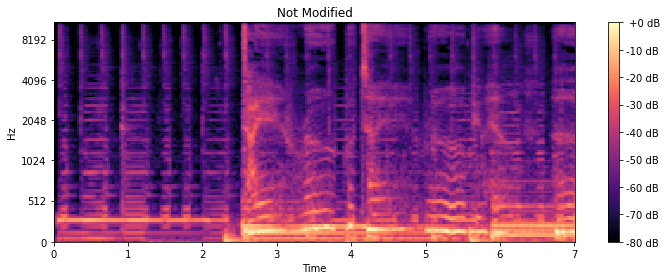

In [125]:
y, sr = librosa.load(r'.\music_files\000140.wav', duration=7)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+3.0f dB')
plt.title('Not Modified')
plt.tight_layout()

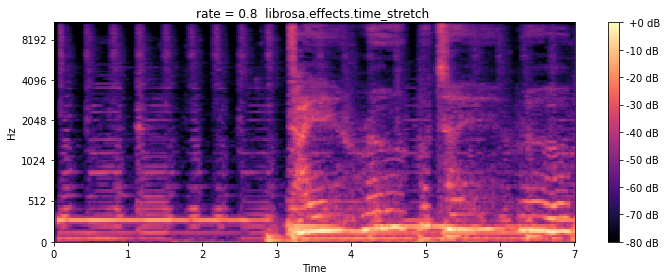

In [126]:
y, sr = librosa.load(r'.\data_ext\000140.wav', duration=7)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+3.0f dB')
plt.title('rate = 0.8  librosa.effects.time_stretch ')
plt.tight_layout()

In [109]:
# Example of Hip-Hop music
y, sr = librosa.load(r'.\music_files\000002.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [28]:
ps

array([[7.2323199e-04, 1.7662343e-02, 3.8864449e-02, ..., 2.5145960e+00,
        1.5025709e+00, 6.9933212e-01],
       [6.6866580e-04, 7.7463798e-03, 1.2286111e-02, ..., 5.9754841e-02,
        1.7819265e-02, 2.4443906e-02],
       [2.6140097e-04, 1.4607038e-03, 4.9871951e-03, ..., 3.7951291e-02,
        1.4478482e-02, 1.4929770e-02],
       ...,
       [2.6496744e-05, 1.3884400e-04, 2.4615056e-03, ..., 7.9340845e-02,
        1.5055977e-01, 1.7172569e-01],
       [4.7445751e-06, 3.2358297e-05, 1.0556724e-03, ..., 3.3405937e-02,
        4.0437892e-02, 3.0414421e-02],
       [4.0698254e-08, 4.0314856e-07, 9.6257645e-05, ..., 1.1674017e-03,
        3.7932274e-04, 1.1907755e-03]], dtype=float32)

In [29]:
IPython.display.Audio(data=y, rate=sr)

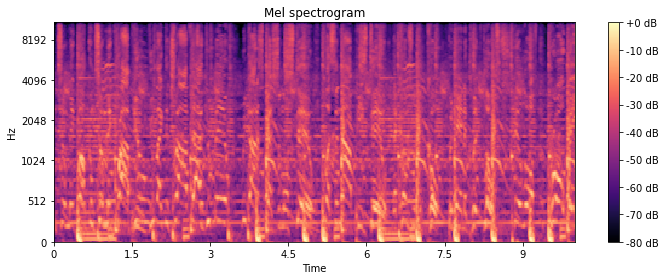

In [111]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

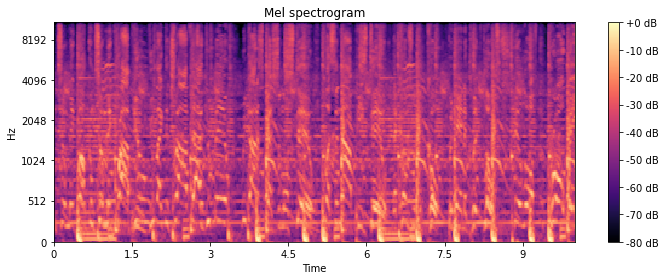

In [30]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [31]:

y, sr = librosa.load(r'.\music_files\000010.mp3', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [32]:
IPython.display.Audio(data=y, rate=sr)

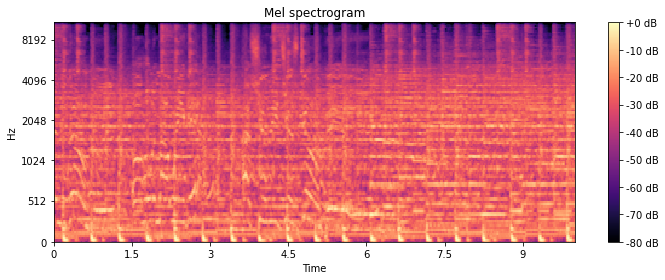

In [33]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [34]:

y, sr = librosa.load(r'.\music_files\000255.mp3', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [35]:
IPython.display.Audio(data=y, rate=sr)

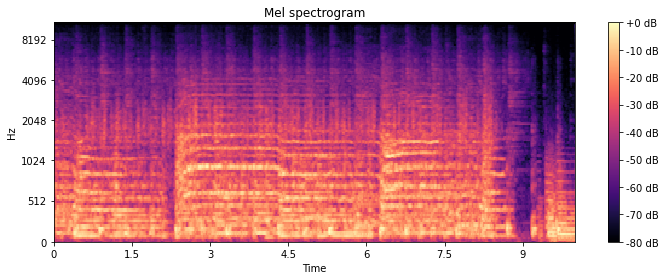

In [36]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [122]:
for row in data.itertuples():
    print(row.path)

000002.wav
000005.wav
000010.wav
000140.wav
000141.wav
000148.wav
000182.wav
000190.wav
000193.wav
000194.wav
000197.wav
000200.wav
000203.wav
000204.wav
000207.wav
000210.wav
000211.wav
000212.wav
000213.wav
000255.wav
000256.wav
000368.wav
000424.wav
000459.wav
000534.wav
000540.wav
000546.wav
000574.wav
000602.wav
000615.wav
000620.wav
000621.wav
000625.wav
000666.wav
000667.wav
000676.wav
000690.wav
000694.wav
000695.wav
000704.wav
000705.wav
000706.wav
000707.wav
000708.wav
000709.wav
000714.wav
000715.wav
000716.wav
000718.wav
000777.wav
000814.wav
000821.wav
000822.wav
000825.wav
000853.wav
000890.wav
000892.wav
000897.wav
000993.wav
000995.wav
000997.wav
000998.wav
001039.wav
001040.wav
001066.wav
001069.wav
001073.wav
001075.wav
001082.wav
001083.wav
001087.wav
001102.wav
001193.wav
001195.wav
001196.wav
001197.wav
001249.wav
001259.wav
001270.wav
001276.wav
001277.wav
001278.wav
001417.wav
001427.wav
001443.wav
001482.wav
001510.wav
001544.wav
001642.wav
001644.wav
001649.wav

In [123]:

rate = 0.8 

for row in data.itertuples():
    y, sr = librosa.load('C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/music_files/' + row.path)  
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    print(row.path )
    soundfile.write("C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/data_ext/" + row.path ,y_changed, sr,format="wav")

000002.wav
000005.wav
000010.wav
000140.wav
000141.wav
000148.wav
000182.wav
000190.wav
000193.wav
000194.wav
000197.wav
000200.wav
000203.wav
000204.wav
000207.wav
000210.wav
000211.wav
000212.wav
000213.wav
000255.wav
000256.wav
000368.wav
000424.wav
000459.wav
000534.wav
000540.wav
000546.wav
000574.wav
000602.wav
000615.wav
000620.wav
000621.wav
000625.wav
000666.wav
000667.wav
000676.wav
000690.wav
000694.wav
000695.wav
000704.wav
000705.wav
000706.wav
000707.wav
000708.wav
000709.wav
000714.wav
000715.wav
000716.wav
000718.wav
000777.wav
000814.wav
000821.wav
000822.wav
000825.wav
000853.wav
000890.wav
000892.wav
000897.wav
000993.wav
000995.wav
000997.wav
000998.wav
001039.wav
001040.wav
001066.wav
001069.wav
001073.wav
001075.wav
001082.wav
001083.wav
001087.wav
001102.wav
001193.wav
001195.wav
001196.wav
001197.wav
001249.wav
001259.wav
001270.wav
001276.wav
001277.wav
001278.wav
001417.wav
001427.wav
001443.wav
001482.wav
001510.wav
001544.wav
001642.wav
001644.wav
001649.wav

In [124]:
rate = 0.9

for row in data.itertuples():
    y, sr = librosa.load('C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/music_files/' + row.path) 
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    print(row.path )
    soundfile.write('C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/data_ext2/' + row.path ,y_changed, sr)

000002.wav
000005.wav
000010.wav
000140.wav
000141.wav
000148.wav
000182.wav
000190.wav
000193.wav
000194.wav
000197.wav
000200.wav
000203.wav
000204.wav
000207.wav
000210.wav
000211.wav
000212.wav
000213.wav
000255.wav
000256.wav
000368.wav
000424.wav
000459.wav
000534.wav
000540.wav
000546.wav
000574.wav
000602.wav
000615.wav
000620.wav
000621.wav
000625.wav
000666.wav
000667.wav
000676.wav
000690.wav
000694.wav
000695.wav
000704.wav
000705.wav
000706.wav
000707.wav
000708.wav
000709.wav
000714.wav
000715.wav
000716.wav
000718.wav
000777.wav
000814.wav
000821.wav
000822.wav
000825.wav
000853.wav
000890.wav
000892.wav
000897.wav
000993.wav
000995.wav
000997.wav
000998.wav
001039.wav
001040.wav
001066.wav
001069.wav
001073.wav
001075.wav
001082.wav
001083.wav
001087.wav
001102.wav
001193.wav
001195.wav
001196.wav
001197.wav
001249.wav
001259.wav
001270.wav
001276.wav
001277.wav
001278.wav
001417.wav
001427.wav
001443.wav
001482.wav
001510.wav
001544.wav
001642.wav
001644.wav
001649.wav

In [125]:
n_steps = 2 

for row in data.itertuples():
    y, sr = librosa.load('C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/music_files/' + row.path) 
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    print(row.path )
    soundfile.write('C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/data_ext1/' + row.path ,y_changed, sr)

000002.wav
000005.wav
000010.wav
000140.wav
000141.wav
000148.wav
000182.wav
000190.wav
000193.wav
000194.wav
000197.wav
000200.wav
000203.wav
000204.wav
000207.wav
000210.wav
000211.wav
000212.wav
000213.wav
000255.wav
000256.wav
000368.wav
000424.wav
000459.wav
000534.wav
000540.wav
000546.wav
000574.wav
000602.wav
000615.wav
000620.wav
000621.wav
000625.wav
000666.wav
000667.wav
000676.wav
000690.wav
000694.wav
000695.wav
000704.wav
000705.wav
000706.wav
000707.wav
000708.wav
000709.wav
000714.wav
000715.wav
000716.wav
000718.wav
000777.wav
000814.wav
000821.wav
000822.wav
000825.wav
000853.wav
000890.wav
000892.wav
000897.wav
000993.wav
000995.wav
000997.wav
000998.wav
001039.wav
001040.wav
001066.wav
001069.wav
001073.wav
001075.wav
001082.wav
001083.wav
001087.wav
001102.wav
001193.wav
001195.wav
001196.wav
001197.wav
001249.wav
001259.wav
001270.wav
001276.wav
001277.wav
001278.wav
001417.wav
001427.wav
001443.wav
001482.wav
001510.wav
001544.wav
001642.wav
001644.wav
001649.wav

In [126]:
n_steps = -2 

for row in data.itertuples():
    y, sr = librosa.load('C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/music_files/' + row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    print(row.path )
    soundfile.write('C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/data_ext3/' + row.path ,y_changed, sr)

000002.wav
000005.wav
000010.wav
000140.wav
000141.wav
000148.wav
000182.wav
000190.wav
000193.wav
000194.wav
000197.wav
000200.wav
000203.wav
000204.wav
000207.wav
000210.wav
000211.wav
000212.wav
000213.wav
000255.wav
000256.wav
000368.wav
000424.wav
000459.wav
000534.wav
000540.wav
000546.wav
000574.wav
000602.wav
000615.wav
000620.wav
000621.wav
000625.wav
000666.wav
000667.wav
000676.wav
000690.wav
000694.wav
000695.wav
000704.wav
000705.wav
000706.wav
000707.wav
000708.wav
000709.wav
000714.wav
000715.wav
000716.wav
000718.wav
000777.wav
000814.wav
000821.wav
000822.wav
000825.wav
000853.wav
000890.wav
000892.wav
000897.wav
000993.wav
000995.wav
000997.wav
000998.wav
001039.wav
001040.wav
001066.wav
001069.wav
001073.wav
001075.wav
001082.wav
001083.wav
001087.wav
001102.wav
001193.wav
001195.wav
001196.wav
001197.wav
001249.wav
001259.wav
001270.wav
001276.wav
001277.wav
001278.wav
001417.wav
001427.wav
001443.wav
001482.wav
001510.wav
001544.wav
001642.wav
001644.wav
001649.wav

In [37]:
# Example of Rock music (original)
y, sr = librosa.load(r'.\music_files\000002.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [38]:
 IPython.display.Audio(data=y, rate=sr)

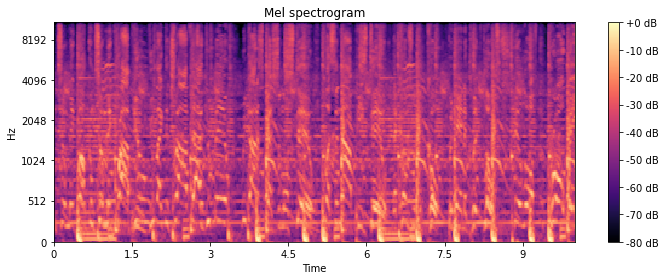

In [39]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [40]:

y, sr = librosa.load(r'.\music_files\000002.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [41]:
IPython.display.Audio(data=y, rate=sr)

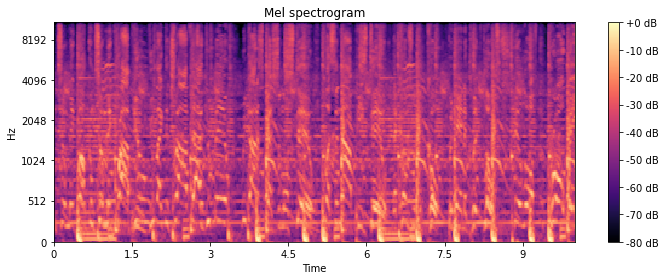

In [42]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [43]:
# Example of Rock music (pitch-shift 2)
y, sr = librosa.load(r'.\music_files\000002.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [44]:
IPython.display.Audio(data=y, rate=sr)

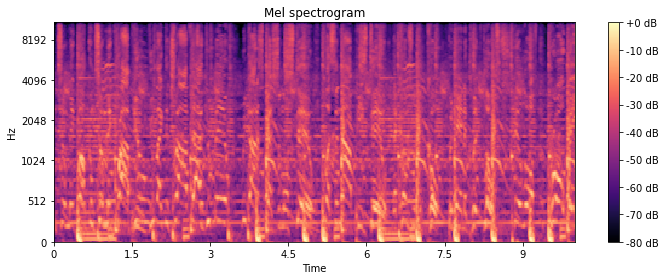

In [45]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [149]:
c=0;
for row in data.itertuples():
    if(c>10): break;
    y, sr = librosa.load(r'C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/music_files/' + row.path, duration=2)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    print(ps.shape)
    y, sr = librosa.load(r'C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/music_files/' + row.path, duration=4)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    print(ps.shape)
    y, sr = librosa.load(r'C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/music_files/' + row.path, duration=5)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    print(ps.shape)
    y, sr = librosa.load(r'C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/music_files/' + row.path, duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    print(ps.shape)
    c+=1

(128, 87)
(128, 173)
(128, 216)
(128, 431)
(128, 87)
(128, 173)
(128, 216)
(128, 431)
(128, 87)
(128, 173)
(128, 216)
(128, 431)
(128, 87)
(128, 173)
(128, 216)
(128, 431)
(128, 87)
(128, 173)
(128, 216)
(128, 431)
(128, 87)
(128, 173)
(128, 216)
(128, 431)
(128, 87)
(128, 173)
(128, 216)
(128, 431)
(128, 87)
(128, 173)
(128, 216)
(128, 431)
(128, 87)
(128, 173)
(128, 216)
(128, 431)
(128, 87)
(128, 173)
(128, 216)
(128, 431)
(128, 87)
(128, 173)
(128, 216)
(128, 431)


In [46]:
Dataset1 = [] # Dataset1

for row in data.itertuples():
    y, sr = librosa.load(r'C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/music_files/' + row.path, duration=4)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    print(row.path )
    if ps.shape != (128, 173): continue
    #if ps.shape != (128, 431): continue
    D1.append( (ps, row.set_genreNumber) )

000002.wav
000005.wav
000010.wav
000140.wav
000141.wav
000148.wav
000182.wav
000190.wav
000193.wav
000194.wav
000197.wav
000200.wav
000203.wav
000204.wav
000207.wav
000210.wav
000211.wav
000212.wav
000213.wav
000255.wav
000256.wav
000368.wav
000424.wav
000459.wav
000534.wav
000540.wav
000546.wav
000574.wav
000602.wav
000615.wav
000620.wav
000621.wav
000625.wav
000666.wav
000667.wav
000676.wav
000690.wav
000694.wav
000695.wav
000704.wav
000705.wav
000706.wav
000707.wav
000708.wav
000709.wav
000714.wav
000715.wav
000716.wav
000718.wav
000777.wav
000814.wav
000821.wav
000822.wav
000825.wav
000853.wav
000890.wav
000892.wav
000897.wav
000993.wav
000995.wav
000997.wav
000998.wav
001039.wav
001040.wav
001066.wav
001069.wav
001073.wav
001075.wav
001082.wav
001083.wav
001087.wav
001102.wav
001193.wav
001195.wav
001196.wav
001197.wav
001249.wav
001259.wav
001270.wav
001276.wav
001277.wav
001278.wav
001417.wav
001427.wav
001443.wav
001482.wav
001510.wav
001544.wav
001642.wav
001644.wav
001649.wav

In [47]:
Dataset2 = [] # Dataset2 (time stretch 0.8)

for row in data.itertuples():
    y, sr = librosa.load(r'C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/data_ext/' + row.path, duration=4)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    print(row.path )
    if ps.shape != (128, 173): continue
    D2.append( (ps, row.set_genreNumber) )
    

000002.wav
000005.wav
000010.wav
000140.wav
000141.wav
000148.wav
000182.wav
000190.wav
000193.wav
000194.wav
000197.wav
000200.wav
000203.wav
000204.wav
000207.wav
000210.wav
000211.wav
000212.wav
000213.wav
000255.wav
000256.wav
000368.wav
000424.wav
000459.wav
000534.wav
000540.wav
000546.wav
000574.wav
000602.wav
000615.wav
000620.wav
000621.wav
000625.wav
000666.wav
000667.wav
000676.wav
000690.wav
000694.wav
000695.wav
000704.wav
000705.wav
000706.wav
000707.wav
000708.wav
000709.wav
000714.wav
000715.wav
000716.wav
000718.wav
000777.wav
000814.wav
000821.wav
000822.wav
000825.wav
000853.wav
000890.wav
000892.wav
000897.wav
000993.wav
000995.wav
000997.wav
000998.wav
001039.wav
001040.wav
001066.wav
001069.wav
001073.wav
001075.wav
001082.wav
001083.wav
001087.wav
001102.wav
001193.wav
001195.wav
001196.wav
001197.wav
001249.wav
001259.wav
001270.wav
001276.wav
001277.wav
001278.wav
001417.wav
001427.wav
001443.wav
001482.wav
001510.wav
001544.wav
001642.wav
001644.wav
001649.wav

In [48]:
Dataset3 = [] # Dataset3 (pitch shift 2)

for row in data.itertuples():
    y, sr = librosa.load(r'C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/data_ext1/' + row.path, duration=4)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    print(row.path )
    if ps.shape != (128, 173): continue
    D3.append( (ps, row.set_genreNumber) )
    

000002.wav
000005.wav
000010.wav
000140.wav
000141.wav
000148.wav
000182.wav
000190.wav
000193.wav
000194.wav
000197.wav
000200.wav
000203.wav
000204.wav
000207.wav
000210.wav
000211.wav
000212.wav
000213.wav
000255.wav
000256.wav
000368.wav
000424.wav
000459.wav
000534.wav
000540.wav
000546.wav
000574.wav
000602.wav
000615.wav
000620.wav
000621.wav
000625.wav
000666.wav
000667.wav
000676.wav
000690.wav
000694.wav
000695.wav
000704.wav
000705.wav
000706.wav
000707.wav
000708.wav
000709.wav
000714.wav
000715.wav
000716.wav
000718.wav
000777.wav
000814.wav
000821.wav
000822.wav
000825.wav
000853.wav
000890.wav
000892.wav
000897.wav
000993.wav
000995.wav
000997.wav
000998.wav
001039.wav
001040.wav
001066.wav
001069.wav
001073.wav
001075.wav
001082.wav
001083.wav
001087.wav
001102.wav
001193.wav
001195.wav
001196.wav
001197.wav
001249.wav
001259.wav
001270.wav
001276.wav
001277.wav
001278.wav
001417.wav
001427.wav
001443.wav
001482.wav
001510.wav
001544.wav
001642.wav
001644.wav
001649.wav

In [49]:
Dataset4 = [] # Dataset4 (time stretch 1.1)

for row in data.itertuples():
    y, sr = librosa.load(r'C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/data_ext2/' + row.path, duration=4)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    print(row.path )
    if ps.shape != (128, 173): continue
    D4.append( (ps, row.set_genreNumber) )
    

000002.wav
000005.wav
000010.wav
000140.wav
000141.wav
000148.wav
000182.wav
000190.wav
000193.wav
000194.wav
000197.wav
000200.wav
000203.wav
000204.wav
000207.wav
000210.wav
000211.wav
000212.wav
000213.wav
000255.wav
000256.wav
000368.wav
000424.wav
000459.wav
000534.wav
000540.wav
000546.wav
000574.wav
000602.wav
000615.wav
000620.wav
000621.wav
000625.wav
000666.wav
000667.wav
000676.wav
000690.wav
000694.wav
000695.wav
000704.wav
000705.wav
000706.wav
000707.wav
000708.wav
000709.wav
000714.wav
000715.wav
000716.wav
000718.wav
000777.wav
000814.wav
000821.wav
000822.wav
000825.wav
000853.wav
000890.wav
000892.wav
000897.wav
000993.wav
000995.wav
000997.wav
000998.wav
001039.wav
001040.wav
001066.wav
001069.wav
001073.wav
001075.wav
001082.wav
001083.wav
001087.wav
001102.wav
001193.wav
001195.wav
001196.wav
001197.wav
001249.wav
001259.wav
001270.wav
001276.wav
001277.wav
001278.wav
001417.wav
001427.wav
001443.wav
001482.wav
001510.wav
001544.wav
001642.wav
001644.wav
001649.wav

In [50]:
Dataset5 = [] # Dataset5 (pitch shift -2)

for row in data.itertuples():
    y, sr = librosa.load(r'C://Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/fma_small_augmented3/' + row.path, duration=4)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    print(row.path )
    if ps.shape != (128, 173): continue
    D5.append( (ps, row.set_genreNumber) )
    

000002.wav
000005.wav
000010.wav
000140.wav
000141.wav
000148.wav
000182.wav
000190.wav
000193.wav
000194.wav
000197.wav
000200.wav
000203.wav
000204.wav
000207.wav
000210.wav
000211.wav
000212.wav
000213.wav
000255.wav
000256.wav
000368.wav
000424.wav
000459.wav
000534.wav
000540.wav
000546.wav
000574.wav
000602.wav
000615.wav
000620.wav
000621.wav
000625.wav
000666.wav
000667.wav
000676.wav
000690.wav
000694.wav
000695.wav
000704.wav
000705.wav
000706.wav
000707.wav
000708.wav
000709.wav
000714.wav
000715.wav
000716.wav
000718.wav
000777.wav
000814.wav
000821.wav
000822.wav
000825.wav
000853.wav
000890.wav
000892.wav
000897.wav
000993.wav
000995.wav
000997.wav
000998.wav
001039.wav
001040.wav
001066.wav
001069.wav
001073.wav
001075.wav
001082.wav
001083.wav
001087.wav
001102.wav
001193.wav
001195.wav
001196.wav
001197.wav
001249.wav
001259.wav
001270.wav
001276.wav
001277.wav
001278.wav
001417.wav
001427.wav
001443.wav
001482.wav
001510.wav
001544.wav
001642.wav
001644.wav
001649.wav

In [51]:
#D5

In [52]:
Dataset = Dataset1 + Dataset2 + Dataset3 + Dataset4 + Dataset5

In [53]:
print("lenght number of samples: ", len(Dataset))

Nu|mber of samples:  610


In [105]:
dataset = Dataset
random.shuffle(dataset)

#train dev test split 8:1:1
train = dataset[:320]
dev = dataset[320:360]
test = dataset[360:]

X_train, Y_train = zip(*train)
X_dev, Y_dev = zip(*dev)
X_test, Y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 173, 1) ) for x in X_train])
X_dev = np.array([x.reshape( (128, 173, 1) ) for x in X_dev])
X_test = np.array([x.reshape( (128, 173, 1) ) for x in X_test])
#X_train = np.array([x.reshape( (128, 431, 1) ) for x in X_train])
#X_dev = np.array([x.reshape( (128, 431, 1) ) for x in X_dev])
#X_test = np.array([x.reshape( (128, 431, 1) ) for x in X_test])

# One-Hot encoding for classes
print(Y_train)
Y_train = np.array(keras.utils.to_categorical(Y_train, 8))
print(Y_train)
Y_dev = np.array(keras.utils.to_categorical(Y_dev, 8))
Y_test = np.array(keras.utils.to_categorical(Y_test, 8))

ValueError: not enough values to unpack (expected 2, got 0)

In [117]:
model = Sequential()
#input_shape=(128, 431, 1)
input_shape=(128, 173, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

#model.add(Conv2D(48, (5, 5), padding="same"))
#model.add(AveragePooling2D((2, 2), strides=(2,2)))
#model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(8))
model.add(Activation('softmax'))

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 124, 169, 24)      624       
_________________________________________________________________
average_pooling2d_6 (Average (None, 62, 84, 24)        0         
_________________________________________________________________
activation_10 (Activation)   (None, 62, 84, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 84, 48)        28848     
_________________________________________________________________
average_pooling2d_7 (Average (None, 31, 42, 48)        0         
_________________________________________________________________
activation_11 (Activation)   (None, 31, 42, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 42, 48)       

In [64]:
epochs = 200
batch_size = 8
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

In [65]:
epochs = 100
batch_size = 64
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [66]:
keras

<module 'keras' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\keras\\__init__.py'>

Epoch 1/100
1/5 [=====>........................] - ETA: 0s - loss: 5.1730 - accuracy: 0.1875WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
5/5 [==============================] - 17s 3s/step - loss: 3.2927 - accuracy: 0.2250 - val_loss: 1.8262 - val_accuracy: 0.4500
Epoch 2/100
5/5 [==============================] - 15s 3s/step - loss: 1.8825 - accuracy: 0.3250 - val_loss: 1.7141 - val_accuracy: 0.4750
Epoch 3/100
5/5 [==============================] - 15s 3s/step - loss: 1.7308 - accuracy: 0.4125 - val_loss: 1.4423 - val_accuracy: 0.4750
Epoch 4/100
5/5 [==============================] - 15s 3s/step - loss: 1.6546 - accuracy: 0.4187 - val_loss: 1.3744 - val_accuracy: 0.5000
Epoch 5/100
5/5 [==============================] - 15s 3s/step - loss: 1.4376 - ac

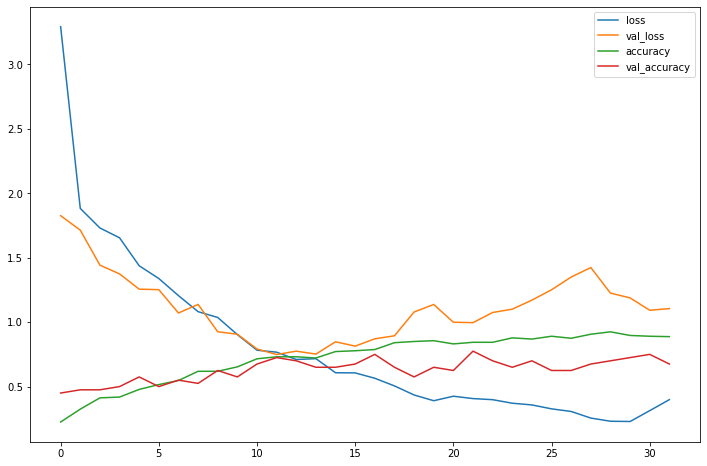

8/8 [==============================] - 3s 393ms/step - loss: 1.7724 - accuracy: 0.7200
Test loss: 1.7724287509918213
Test accuracy: 0.7200000286102295


In [67]:

with tf.device('/gpu:0'):
    tb_hist = tf.keras.callbacks.TensorBoard(log_dir='C:/Users/kosta/.keras/graph', histogram_freq=0, write_graph=True, write_images=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)
    hist = model.fit(x=X_train, y=Y_train, epochs=epochs, batch_size=batch_size, validation_data= (X_dev, Y_dev), callbacks=[early_stopping, tb_hist]) 

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()

print(model.metrics_names)
evaluation = model.evaluate(x=X_test, y=Y_test)
print(evaluation)
print("losses", evaluation[0],'accuracy:', evaluation[1])

In [68]:
session = tf.compat.v1.keras.backend.get_session()
session

In [69]:

model.save('music_results.h5')

In [70]:

model = load_model('music_results.h5')

In [71]:

data = pd.read_csv(r'C:\Users\kosta\Documents\Projects ML\Kostadin Tenev ML proj\test_sample.csv')

In [72]:
def set_genreNumber(i):
    if i == 'Electronic':
        return 0
    elif i == 'Experimental':
        return 1
    elif i == 'Folk':
        return 2
    elif i == 'Hip-Hop':
        return 3
    elif i == 'International':
        return 4
    elif i == 'Pop':
        return 5
    elif i == 'Rock':
        return 6
    else:
        return '7'
    
data['set_genreNumber'] = data['genre'].apply(set_genreNumber)
data['file_name'] = data['file_name'].apply(lambda x: '{0:0>6}'.format(x))
data['path'] = data['file_name'].astype('str') + ".wav"
data['path'].head(5)

0    000821.wav
1    000822.wav
2    000825.wav
3    000853.wav
4    000890.wav
Name: path, dtype: object

In [104]:
data1=data.copy()
    
data['genre']


0               Pop
1               Pop
2              Rock
3     International
4              Folk
5              Folk
6      Experimental
7              Rock
8      Experimental
9      Experimental
10     Experimental
11             Rock
12             Rock
13     Experimental
14     Experimental
15     Experimental
16     Experimental
17    International
18     Experimental
19             Rock
20             Rock
21             Folk
22             Folk
23             Folk
24             Folk
25     Experimental
26     Experimental
27             Rock
28     Experimental
29     Experimental
30     Experimental
31             Rock
32             Rock
33     Experimental
34       Electronic
35     Experimental
36             Folk
37              Pop
38              Pop
39              Pop
40              Pop
41              Pop
42              Pop
43     Experimental
44    International
45    International
46    International
47    International
48    International
49    International


In [75]:
Dset1 = [] # test dataset

for row in data.itertuples():
    y, sr = librosa.load(r'C:/Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/music_files/' + row.path, duration=4)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    print(ps.shape)
    #if ps.shape != (128, 431): continue
    if ps.shape != (128, 173): continue
    Dset1.append( (ps, row.set_genreNumber) )

(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)


In [76]:
Dset = [] # test dataset

for row in data.itertuples():
    y, sr = librosa.load(r'C:/Users/kosta/Documents/Projects ML/Kostadin Tenev ML proj/music_files/' + row.path, duration=4)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    print(ps.shape)
    #if ps.shape != (128, 431): continue
    if ps.shape != (128, 173): continue
    Dset1.append( (ps, row.set_genreNumber) )

(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)
(128, 173)


In [77]:
print("Nu|mber of samples: ", len(Dset))

Nu|mber of samples:  0


In [79]:
print("Nu|mber of samples: ", len(Dset1))

Nu|mber of samples:  116


In [87]:
Dset1

[(array([[2.0157749e-02, 1.0637754e-01, 1.2696035e+00, ..., 3.4130910e-01,
          3.4243241e-01, 1.0995183e+00],
         [7.7768332e-01, 6.9361820e+00, 3.7025734e+01, ..., 8.6644791e+01,
          8.7349190e+01, 7.3157005e+01],
         [2.9566483e+00, 2.4352051e+01, 5.8260849e+01, ..., 2.7523541e+02,
          2.8155457e+02, 2.8151529e+02],
         ...,
         [1.6020475e-07, 1.2964125e-04, 9.6160610e-04, ..., 9.8963869e-07,
          8.7371445e-06, 8.0239020e-05],
         [2.2784908e-08, 3.4892546e-05, 2.2173315e-04, ..., 2.1610339e-07,
          4.5387405e-06, 4.3918310e-05],
         [2.9458280e-09, 1.4552758e-06, 7.2889034e-06, ..., 1.5118921e-08,
          4.5466828e-07, 4.3902191e-06]], dtype=float32),
  1),
 (array([[7.7118479e-02, 1.8853189e-01, 3.6713237e-01, ..., 3.9840317e-01,
          2.4477093e+00, 2.2084057e+01],
         [5.3491902e-01, 1.4471731e+00, 1.7834127e+00, ..., 3.4343622e+00,
          2.1510551e+01, 1.3129391e+02],
         [2.8834867e+00, 2.9277407e

In [95]:
test = D1
X_test, Y_test = zip(*test)
print(len(X_test),len(X_test[0]))
X_test = np.array([x.reshape( (128, 173, 1) ) for x in X_test])
Y_test = np.array(keras.utils.to_categorical(Y_test, 8))
print(len(X_test),len(X_test[0]),len(X_test[0][0]))
print(X_test)

116 128
116 128 173
[[[[2.01577488e-02]
   [1.06377542e-01]
   [1.26960349e+00]
   ...
   [3.41309100e-01]
   [3.42432410e-01]
   [1.09951830e+00]]

  [[7.77683318e-01]
   [6.93618202e+00]
   [3.70257339e+01]
   ...
   [8.66447906e+01]
   [8.73491898e+01]
   [7.31570053e+01]]

  [[2.95664835e+00]
   [2.43520508e+01]
   [5.82608490e+01]
   ...
   [2.75235413e+02]
   [2.81554565e+02]
   [2.81515289e+02]]

  ...

  [[1.60204749e-07]
   [1.29641252e-04]
   [9.61606100e-04]
   ...
   [9.89638693e-07]
   [8.73714453e-06]
   [8.02390205e-05]]

  [[2.27849082e-08]
   [3.48925460e-05]
   [2.21733149e-04]
   ...
   [2.16103388e-07]
   [4.53874054e-06]
   [4.39183095e-05]]

  [[2.94582803e-09]
   [1.45527576e-06]
   [7.28890336e-06]
   ...
   [1.51189212e-08]
   [4.54668282e-07]
   [4.39021915e-06]]]


 [[[7.71184787e-02]
   [1.88531891e-01]
   [3.67132366e-01]
   ...
   [3.98403168e-01]
   [2.44770932e+00]
   [2.20840569e+01]]

  [[5.34919024e-01]
   [1.44717312e+00]
   [1.78341269e+00]
   ...
 

In [63]:
test = D
X_test, Y_test = zip(*test)
X_test = np.array([x.reshape( (128, 431, 1) ) for x in X_test])
Y_test = np.array(keras.utils.to_categorical(Y_test, 8))

In [101]:
data['file_name']

0     000821
1     000822
2     000825
3     000853
4     000890
5     000892
6     000897
7     000993
8     000995
9     000997
10    000998
11    001039
12    001040
13    001066
14    001069
15    001073
16    001075
17    001082
18    001083
19    001087
20    001102
21    001193
22    001195
23    001196
24    001197
25    001249
26    001259
27    001270
28    001276
29    001277
30    001278
31    001417
32    001427
33    001443
34    001482
35    001510
36    001544
37    001642
38    001644
39    001649
40    001661
41    001663
42    001666
43    001673
44    001680
45    001681
46    001682
47    001683
48    001684
49    001685
50    001686
51    001687
52    001688
53    001689
54    001701
55    001702
56    001703
57    001704
Name: file_name, dtype: object

In [102]:
yhat = model.predict_classes(X_test)

for i in range(len(D1)):
    print('file_name: ' + data['file_name'][i%57] + ' True: ' + str(argmax(Y_test[i])) + ', Predict: ' + str(yhat[i])+' res='+str((argmax(Y_test[i])==yhat[i])))
"""
    try:
        print('file_name: ' + data['file_name'][i] + ' True: ' + str(argmax(Y_test[i])) + ', Predict: ' + str(yhat[i])+' res='+str((argmax(Y_test[i])==yhat[i])))
    except:
        print("ex")"""

file_name: 000821 True: 1, Predict: 1 res=True
file_name: 000822 True: 1, Predict: 1 res=True
file_name: 000825 True: 3, Predict: 3 res=True
file_name: 000853 True: 5, Predict: 5 res=True
file_name: 000890 True: 2, Predict: 2 res=True
file_name: 000892 True: 2, Predict: 2 res=True
file_name: 000897 True: 4, Predict: 4 res=True
file_name: 000993 True: 3, Predict: 3 res=True
file_name: 000995 True: 4, Predict: 4 res=True
file_name: 000997 True: 4, Predict: 4 res=True
file_name: 000998 True: 4, Predict: 4 res=True
file_name: 001039 True: 3, Predict: 3 res=True
file_name: 001040 True: 3, Predict: 3 res=True
file_name: 001066 True: 4, Predict: 3 res=False
file_name: 001069 True: 4, Predict: 4 res=True
file_name: 001073 True: 4, Predict: 4 res=True
file_name: 001075 True: 4, Predict: 4 res=True
file_name: 001082 True: 5, Predict: 5 res=True
file_name: 001083 True: 4, Predict: 4 res=True
file_name: 001087 True: 3, Predict: 3 res=True
file_name: 001102 True: 3, Predict: 3 res=True
file_name: 0

'\n    try:\n        print(\'file_name: \' + data[\'file_name\'][i] + \' True: \' + str(argmax(Y_test[i])) + \', Predict: \' + str(yhat[i])+\' res=\'+str((argmax(Y_test[i])==yhat[i])))\n    except:\n        print("ex")'